In [1]:
# Import everything we need.
# (pandas, matplotlib, seaborn and a bunch of sklearn)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# read the main data
data = pd.read_csv('datasets_dataset.csv')
data.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [3]:
# Remove ID column, it is not necessary
del data['ID']

In [4]:
# x = feature columns, all the columns except the last column
x = data.iloc[:, :-1]

# y = target column
y = data.iloc[:, -1]

In [5]:
# Feature selection
# we select 8 features, this value was experimentally derived. See graph below
sel = SelectKBest(chi2, k=8)
sel.fit(x, y)

# Get the columns so we have labels for later
cols = sel.get_support(indices=True)
x_new = x.iloc[:,cols]

In [6]:
# Get data from experimenting with different amount of features
included_df = pd.read_csv('included_features.csv')
included_df.head(10)

,Features,Random Forest,Naive Bayes
0,3,0.941,0.882
1,4,1.000,0.882
2,5,1.000,1.000
3,6,1.000,1.000
4,7,1.000,0.941
5,8,1.000,1.000
6,9,1.000,0.941
7,10,1.000,0.941
8,11,1.000,0.941
9,12,1.000,0.882


Text(0, 0.5, 'Accuracy')

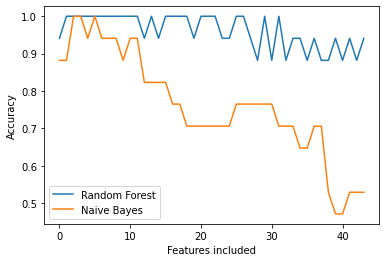

In [7]:
# Plot the accuracy of both models for different amount of features
del included_df['Features']

ax = included_df.plot()
ax.set_xlabel('Features included')
ax.set_ylabel('Accuracy')

In [8]:
# Split data into training and testing data. Using 85/15 ratio
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.15, random_state=0)

# First model, random forest
model1 = RandomForestClassifier(n_jobs=2, random_state=0)
model1.fit(x_train, y_train)

# Second model, naive bayes
model2 = GaussianNB()
model2.fit(x_train, y_train)

GaussianNB()

In [9]:
# Predict with both models
preds1 = model1.predict(x_test)
preds2 = model2.predict(x_test)

# Print the results
print('Random Forest Predictions')
print(preds1)
print()
print('Naive Bayes Predictions')
print(preds2)

Random Forest Predictions
[0 0 4 3 4 0 0 5 4 0 0 4 4 0 4 5 5]

Naive Bayes Predictions
[0 0 4 3 4 0 0 5 4 0 0 4 4 0 4 5 5]


Random Forest Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Accuracy: 1.0


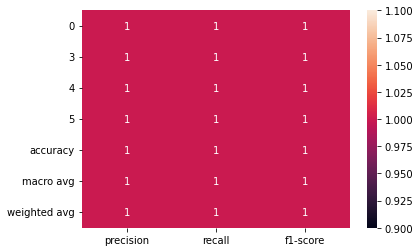

Naive Bayes Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Accuracy: 1.0


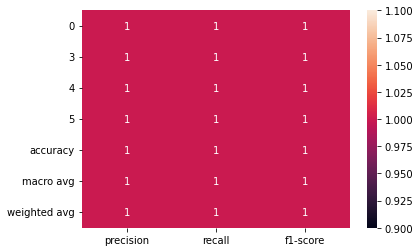

In [10]:
# Print metrics and show a heatmap for the performance
print('Random Forest Performance')
print( classification_report(y_test, preds1))
print('Accuracy: ' + str(accuracy_score(y_test, preds1)))

# Show the heatmap using seaborn
fig = plt.figure()
rt_df = pd.DataFrame(classification_report(y_test, preds1, output_dict=True))
sns.heatmap(pd.DataFrame(rt_df).iloc[:-1, :].T, annot=True)
plt.show()

print('========================================================')

# Print metrics and show a heatmap for the performance
print('Naive Bayes Performance')
print( classification_report(y_test, preds2))
print('Accuracy: ' + str(accuracy_score(y_test, preds2)))

# Show the heatmap using seaborn
fig = plt.figure()
rt_df = pd.DataFrame(classification_report(y_test, preds2, output_dict=True))
sns.heatmap(pd.DataFrame(rt_df).iloc[:-1, :].T, annot=True)
plt.show()

In [11]:
# Get feature importance and sort it in descending order. Then print
print('Feature Importance')
l = list(zip(x_train, model1.feature_importances_))
l.sort(reverse=True, key=lambda x: x[1])
print(l[0])
print(l[1])
print(l[2])

Feature Importance
('Week8_Total', 0.32646580645440304)
('Week7_MP3', 0.21471589495529703)
('Week6_Stat1', 0.1039278660433305)


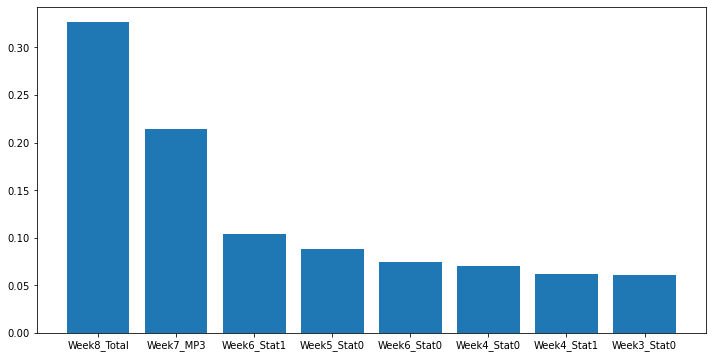

In [12]:
# Display a bar chart for the feature importance
f, i = zip(*l)

plt.figure(figsize=(12,6))
plt.bar(f, i)
plt.show()